# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 7.8 MB/s eta 0:00:0000:0100:01


In [2]:
!pip list

Package                       Version
----------------------------- ------------------
absl-py                       2.0.0
anyio                         3.7.0
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
asttokens                     2.2.1
astunparse                    1.6.3
async-lru                     2.0.4
attrs                         23.1.0
Babel                         2.13.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bleach                        6.0.0
cachetools                    5.3.1
certifi                       2024.2.2
cffi                          1.15.1
charset-normalizer            3.1.0
click                         8.1.7
comm                          0.1.3
contourpy                     1.1.0
cycler                        0.11.0
d2l                           1.0.3
debugpy                       1.6.7
dec

In [3]:
import tensorflow as tf
import os

In [58]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [73]:
import cv2
import imghdr # Helps us check out the file extensions for our particular images
import matplotlib.pyplot as plt

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [60]:
# Problem with Macbook
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

In [12]:
for image_class in os.listdir(data_dir): 
    class_dir = os.path.join(data_dir, image_class)
    
    # Skip if it's not a directory
    if not os.path.isdir(class_dir):
        continue

    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [71]:
img = cv2.imread(os.path.join('data','happy','_happy_jumping_on_beach-40815.jpg'))
type(img)

numpy.ndarray

In [72]:
img.shape

(213, 320, 3)

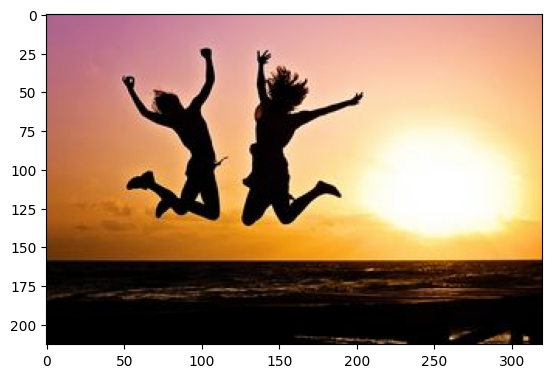

In [77]:
# In case the RGB channels are flipped, you use this to flip it back
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [78]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [79]:
# This is where the data is being loaded
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [85]:
# It is a iterator/generator so you can loop through and continuously pull data batches back
# It is analogous to DataLoader from PyTorch
data_iterator = data.as_numpy_iterator()

In [86]:
# Grabbing one batch
batch = data_iterator.next()

In [87]:
len(batch)

2

In [89]:
batch[0].shape

(32, 256, 256, 3)

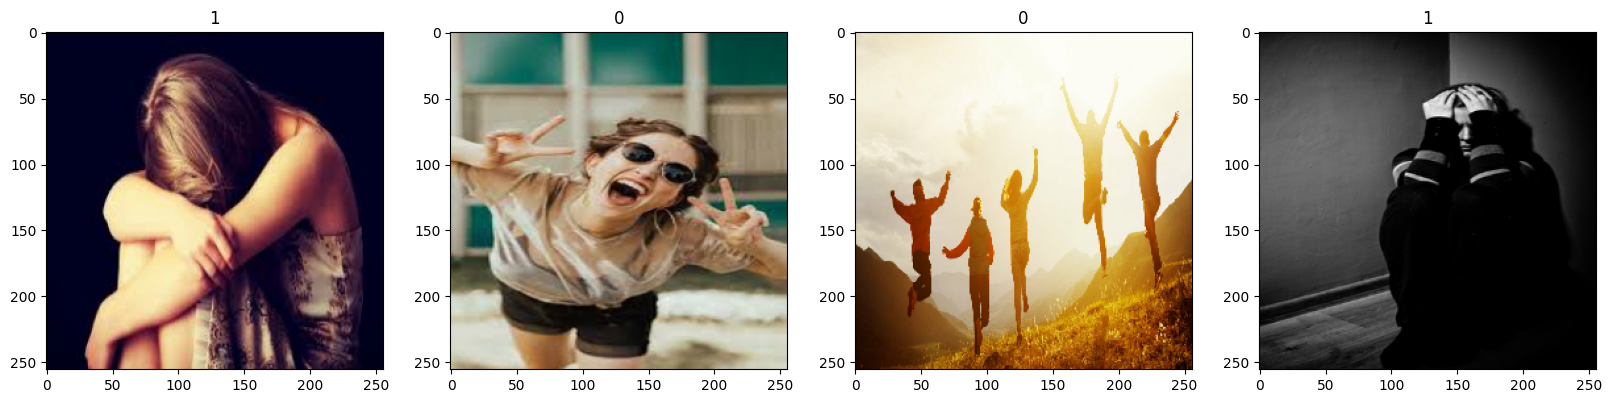

In [88]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [93]:
# Normalising data so it stays between 0 and 1 by doing transformation in pipeline
data = data.map(lambda x,y: (x/255, y))

In [94]:
scaled_iterator = data.as_numpy_iterator()

In [95]:
batch = scaled_iterator.next()
batch[0].max()

1.0

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.9900122 , 0.7903799 , 0.26525736],
          [0.9985907 , 0.7907475 , 0.24957108],
          [0.99215686, 0.7882353 , 0.25490198],
          ...,
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198]],
 
         [[0.9900122 , 0.7903799 , 0.26525736],
          [0.9985907 , 0.7907475 , 0.24957108],
          [0.99215686, 0.7882353 , 0.25490198],
          ...,
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198]],
 
         [[0.9900122 , 0.7903799 , 0.26525736],
          [0.9985907 , 0.7907475 , 0.24957108],
          [0.99215686, 0.7882353 , 0.25490198],
          ...,
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198]],
 
         ...,
 
         [[0.9900122 , 0.7903799 , 0.26525736],
          [0.99859

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

7

In [90]:
# Spltting the entire dataset into training, validation and test
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [97]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [98]:
# You can also add the layers within the sequential brackets like you do in PyTorch
model = Sequential()

In [99]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [100]:
# Conv2D(number of channels/filters, kernel size, stride, activation type, input shape)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

# We've now condensed our output into 1
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
# Here we add in our optimiser, loss functions and metrics if any
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [105]:
logdir='logs'

In [106]:
# This is helpful if you want to save your model at a specific checkpoint
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [107]:
# Fit is the training component
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 887ms/step - loss: 74.3774 - accuracy: 0.5536 - val_loss: 5.7419 - val_accuracy: 0.4688
Epoch 2/20
7/7 [==============================] - 8s 886ms/step - loss: 2.5179 - accuracy: 0.5536 - val_loss: 0.9842 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 8s 919ms/step - loss: 0.5783 - accuracy: 0.7545 - val_loss: 0.5022 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 7s 834ms/step - loss: 0.4649 - accuracy: 0.8795 - val_loss: 0.4886 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 7s 786ms/step - loss: 0.3547 - accuracy: 0.9241 - val_loss: 0.1907 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 7s 811ms/step - loss: 0.2710 - accuracy: 0.9196 - val_loss: 0.1889 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 7s 814ms/step - loss: 0.1856 - accuracy: 0.9509 - val_loss: 0.0982 - val_accuracy: 0.9844
Epoch 8/20
7/7 [===

# 8. Plot Performance

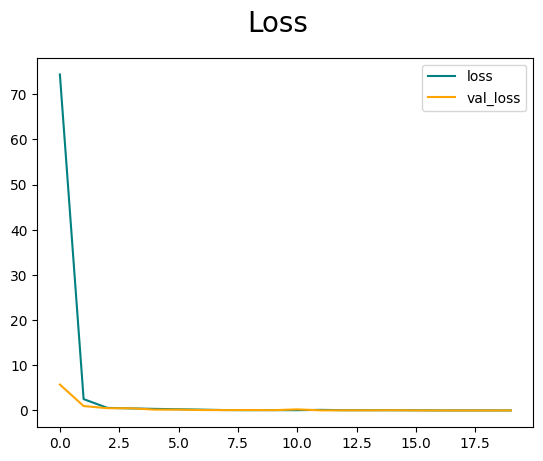

In [108]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

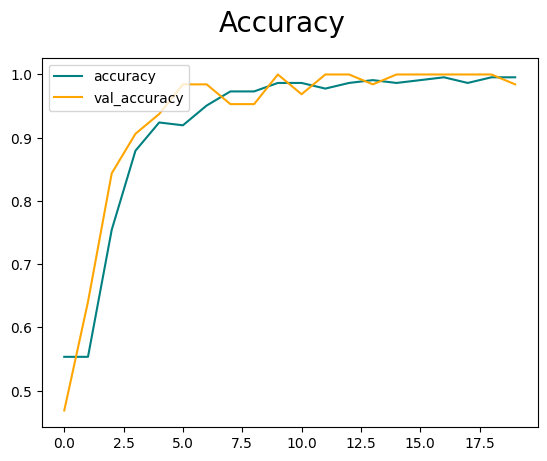

In [109]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [110]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [111]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [112]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 100ms/step


In [138]:
print(f"Precision: {pre.result()},\nRecall: {re.result()},\nAccuracy: {acc.result()}")

Precision: 1.0,
Recall: 1.0,
Accuracy: 1.0


# 10. Test

In [114]:
import cv2

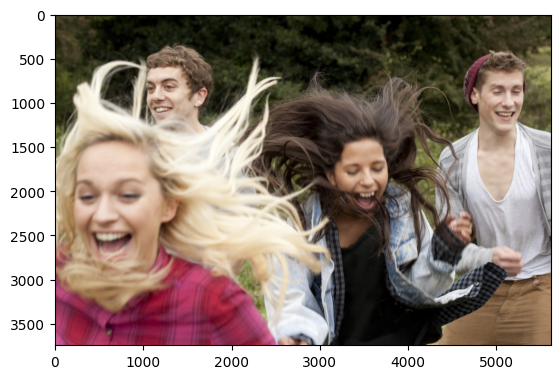

In [120]:
img = cv2.imread('154006829.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

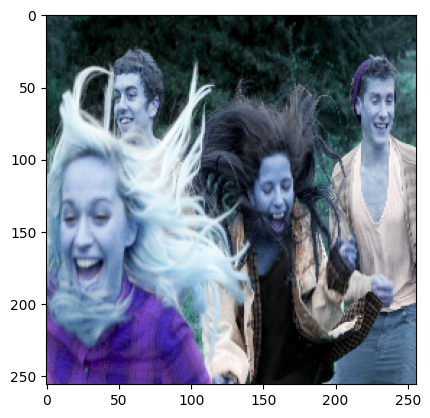

In [124]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [117]:
# predict is the test component
# Expand is very similar to the unsqueeze function
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [118]:
yhat

array([[0.45665824]], dtype=float32)

In [119]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [125]:
from tensorflow.keras.models import load_model

In [126]:
model.save(os.path.join('models','imageclassifier.h5'))

In [131]:
os.path.join('models','imageclassifier.h5')

'models/imageclassifier.h5'

In [129]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [133]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [134]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
